In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

In [2]:
datadir="C:/Users/dfury/OneDrive/Documents/assignments/Spring22/AI/TermPaper/archive"
categories=['Elon Musk','Bill Gates', 'Not Recognized','Johnny Depp']

In [3]:
training_data=[]
def data():
    for c in categories:
        path=os.path.join(datadir, c)
        classification=categories.index(c)
        for img in os.listdir(path):
            img_array= cv2.imread(os.path.join(path,img))
            data=cv2.resize(img_array,(128,128))
            training_data.append([data,classification])
         

In [4]:
data()

In [6]:
print(len(training_data))
random.shuffle(training_data)

536


In [7]:
X=[]
Y=[]
for x,y in training_data:
    X.append(x)
    Y.append(y)
X=np.array(X).reshape(-1,128,128,3)
Y=np.array(Y)

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.initializers import HeNormal

In [9]:
X=X/255.

# DCNN

In [10]:
model=Sequential()
model.add(Conv2D(64, (5,5), kernel_initializer=HeNormal(), input_shape=(128,128,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), kernel_initializer=HeNormal()))
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2)))


model.add(Flatten())

model.add(Dense(64))


model.add(Dense(4, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])
history=model.fit(X,Y, batch_size=16,epochs=15, validation_split=0.2)

print(history.history.keys())

Epoch 1/15
27/27 [==============================] - 5s 170ms/step - loss: 9.0060 - accuracy: 0.3808 - val_loss: 1.2159 - val_accuracy: 0.4815
Epoch 2/15
27/27 [==============================] - 5s 167ms/step - loss: 0.7352 - accuracy: 0.7710 - val_loss: 1.1316 - val_accuracy: 0.6759
Epoch 3/15
27/27 [==============================] - 4s 159ms/step - loss: 0.2863 - accuracy: 0.9112 - val_loss: 1.2256 - val_accuracy: 0.6852
Epoch 4/15
27/27 [==============================] - 5s 171ms/step - loss: 0.1206 - accuracy: 0.9650 - val_loss: 1.1866 - val_accuracy: 0.7315
Epoch 5/15
20/27 [=====================>........] - ETA: 1s - loss: 0.0325 - accuracy: 0.9937

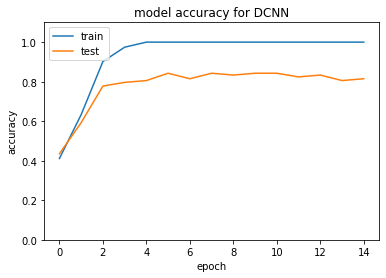

0.8425925970077515


In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy for DCNN')
plt.ylim([0,1.1])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(max(history.history['val_accuracy']))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 64)      4864      
                                                                 
 activation (Activation)     (None, 124, 124, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 60, 60, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

# MLP

In [12]:
model2=Sequential()
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Dense(64))
model2.add(Dense(4,activation='softmax'))


model2.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])
history2=model2.fit(X,Y, batch_size=16,epochs=20, validation_split=0.2)

print(history2.history.keys())

Epoch 1/20
27/27 [==============================] - 1s 24ms/step - loss: 35.6415 - accuracy: 0.4299 - val_loss: 20.2634 - val_accuracy: 0.3426
Epoch 2/20
27/27 [==============================] - 0s 18ms/step - loss: 8.0317 - accuracy: 0.5818 - val_loss: 7.6810 - val_accuracy: 0.5093
Epoch 3/20
27/27 [==============================] - 1s 23ms/step - loss: 4.7798 - accuracy: 0.6215 - val_loss: 7.2616 - val_accuracy: 0.4630
Epoch 4/20
27/27 [==============================] - 1s 19ms/step - loss: 2.9430 - accuracy: 0.7243 - val_loss: 4.4125 - val_accuracy: 0.5463
Epoch 5/20
27/27 [==============================] - 1s 19ms/step - loss: 1.4519 - accuracy: 0.7967 - val_loss: 3.9101 - val_accuracy: 0.5463
Epoch 6/20
27/27 [==============================] - 0s 18ms/step - loss: 1.4133 - accuracy: 0.7523 - val_loss: 3.0850 - val_accuracy: 0.5000
Epoch 7/20
27/27 [==============================] - 1s 22ms/step - loss: 0.4318 - accuracy: 0.8598 - val_loss: 2.2233 - val_accuracy: 0.5926
Epoch 8/20


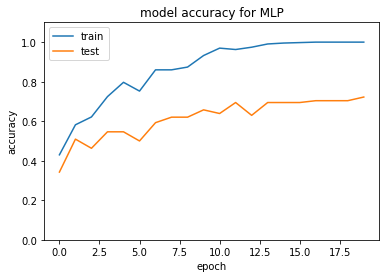

0.7222222089767456


In [14]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy for MLP')
plt.ylim([0,1.1])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(max(history2.history['val_accuracy']))